# ***Importing Python Libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Polynomialdata_train.csv')
data

,target,feature 1,feature 2,feature 3
0,4.131528e+06,5.221849,7.295111,95.716846
1,3.172975e-01,-5.106284,4.220085,-6.172360
2,4.676422e+04,-4.218053,-7.573823,-39.493884
3,1.404175e+05,-18.439122,-2.275148,-40.885857
4,4.788988e+03,13.353046,3.103837,18.622367
...,...,...,...,...
49995,1.853922e+04,-25.309264,-6.094516,75.361431
49996,6.379917e+03,-58.016982,-6.064214,27.146387
49997,3.835601e+06,29.857894,1.422973,75.620505
49998,2.580318e+04,10.793146,1.215972,34.437761


In [ ]:
data.head(10)

,target,feature 1,feature 2,feature 3
0,4.131528e+06,5.221849,7.295111,95.716846
1,3.172975e-01,-5.106284,4.220085,-6.172360
2,4.676422e+04,-4.218053,-7.573823,-39.493884
3,1.404175e+05,-18.439122,-2.275148,-40.885857
4,4.788988e+03,13.353046,3.103837,18.622367
5,1.757194e+01,7.614978,3.154215,-24.546191
6,5.909020e+04,-37.940301,-1.972244,-13.414998
7,5.962051e+06,-21.905507,2.211168,-95.361970
8,1.044580e+00,14.258205,5.233372,-11.073047
9,4.388210e+00,27.395374,1.829287,-37.797851


In [ ]:
m = len(data)
m

50000

In [ ]:
data.columns


Index(['target', 'feature 1', 'feature 2', 'feature 3'], dtype='object')

In [ ]:
#importing dataset
x = data.iloc[0:30000,1:4].values
y = data.iloc[0:30000,0].values
y = y[np.newaxis,:]
y=y.T
y.shape



(30000, 1)

In [ ]:
feature_1 = x[:,0]
feature_2 = x[:,1]
feature_3 = x[:,2]

In [ ]:
m,n=x.shape
m,n
feature_1.shape,y.shape

((30000,), (30000, 1))

# ***Plotting***

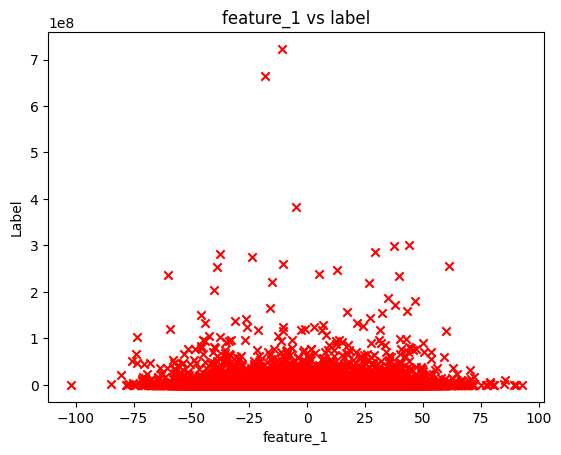

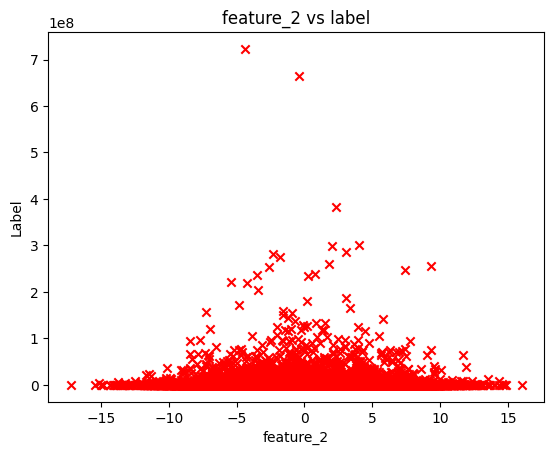

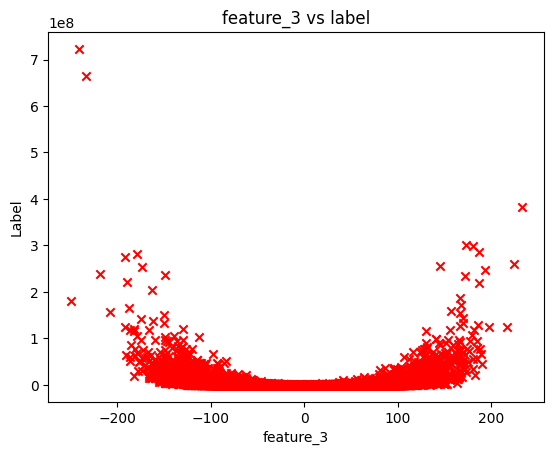

In [ ]:
plt.scatter(feature_1,y,marker='x',c='r')
plt.xlabel('feature_1')
plt.ylabel('Label')
plt.title('feature_1 vs label')
plt.show()

plt.scatter(feature_2,y,marker='x',c='r')
plt.xlabel('feature_2')
plt.ylabel('Label')
plt.title('feature_2 vs label')
plt.show()

plt.scatter(feature_3,y,marker='x',c='r')
plt.xlabel('feature_3')
plt.ylabel('Label')
plt.title('feature_3 vs label')
plt.show()

In [ ]:
mu     = np.mean(x,axis=0)
sigma  = np.std(x,axis=0)
x_mean = (x - mu)
x_norm = (x - mu)/sigma

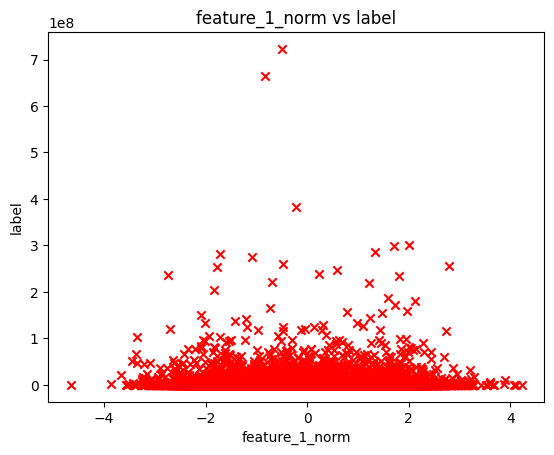

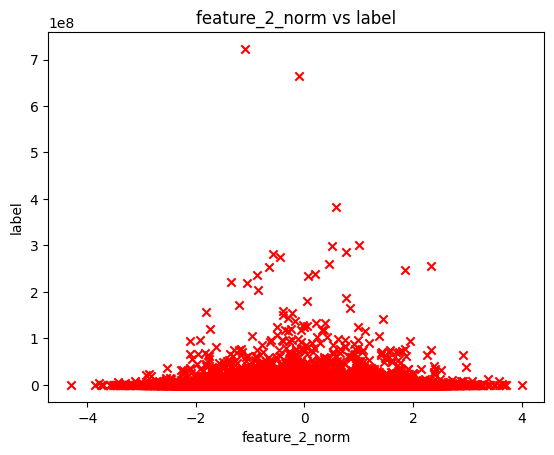

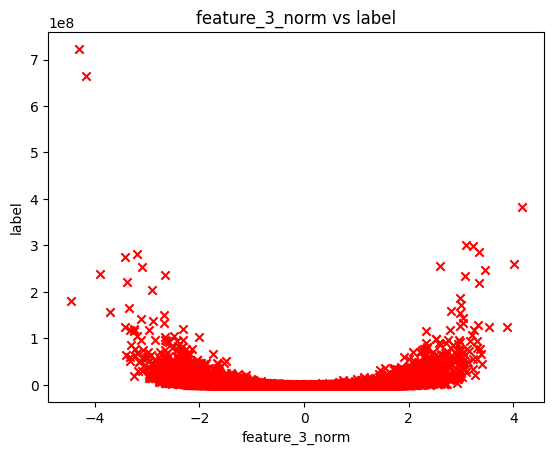

In [ ]:
plt.scatter(x_norm[:,0],y,marker='x',c='r')
plt.xlabel("feature_1_norm")
plt.ylabel("label")
plt.title("feature_1_norm vs label")
plt.show()

plt.scatter(x_norm[:,1],y,marker='x',c='r')
plt.xlabel("feature_2_norm")
plt.ylabel("label")
plt.title("feature_2_norm vs label")
plt.show()

plt.scatter(x_norm[:,2],y,marker='x',c='r')
plt.xlabel("feature_3_norm")
plt.ylabel("label")
plt.title("feature_3_norm vs label")
plt.show()

# ***n-degree polynomial***

In [ ]:
def poly(x,pow):                   # This code iteartes the loop to find the terms for a three variable polynomial by raising each feature to a power until pow.
  m=x.shape[0]
  n=(((pow)*(pow+1)*((2*pow)+1))+(9*(pow)*(pow+1))+(12*pow))//12
  x_poly=np.zeros((m,n))
  k=0
  i=0
  j=0
  while(pow!=0):
    x_poly[:,k]=((x[:,0]**(i))*(x[:,1]**(j))*(x[:,2]**(pow-i-j)))
    j=j+1
    k=k+1
    if(j>(pow-i)):
      i=i+1
      j=0
    if(i>pow):
      pow=pow-1
      i=0
  return x_poly

# ***Cost Function***

In [ ]:
def predict(i, w, b):
    xi = X[i]
    xi=xi[np.newaxis,:]
    #xi=xi.T
    p = np.dot(xi, w) + b
    return p

In [ ]:
def compute_cost(X, y, w, b):

    f_wb = np.dot(X, w) + b
    cost = ((f_wb - y)**2) / (2 * m)
    cost=np.sum(cost)

    return cost

# ***Gradient Descent***

In [ ]:
def compute_gradient(X, y, w, b):

    m,n = X.shape           #(number of examples, number of features)

    y_hat = np.dot(X,w) + b
    err = (y_hat - y)

    dj_db = np.sum(err)
    dj_db = dj_db / m

    dj_dw = (1/m)*(np.dot(X.T, err))


    return dj_db, dj_dw

In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w_history = []

    w = w_in
    b = b_in

    for i in range(num_iters):


        dj_db,dj_dw = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw

        b = b - alpha * dj_db


         # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(X, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")

    return w, b, J_history, w_history #return w and J,w history for graphing


# ***Degree Selection***

In [ ]:
x_cv = data.iloc[30000:,1:4].values
y_cv = data.iloc[30000:,0].values
y_cv=y_cv[np.newaxis,:]
y_cv=y_cv.T

In [ ]:
mu     = np.mean(x_cv,axis=0)
sigma  = np.std(x_cv,axis=0)
x_mean = (x_cv - mu)
x_cv = (x_cv - mu)/sigma

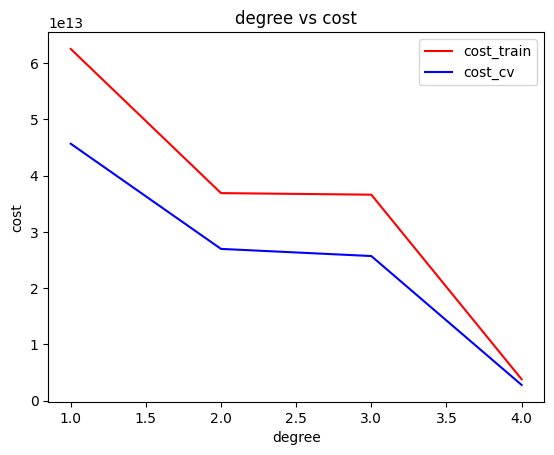

In [ ]:
cost_train=[]
cost_cv=[]
for i in range(1,5):


    X=poly(x_norm,i)
    m,n=X.shape

    iterations = 1500
    alpha = 0.01


    w = np.zeros((n,1))
    b = 0

    for j in range(iterations):


        dj_db,dj_dw = compute_gradient(X, y, w, b)

        w = w - alpha * dj_dw

        b = b - alpha * dj_db

    cost_train_i=compute_cost(X, y, w, b)

    cost_train.append(cost_train_i)



    X_cv=poly(x_cv,i)
    m_cv,n_cv=X_cv.shape

    iterations = 1500
    alpha = 0.01


    w_cv = np.zeros((n_cv,1))
    b_cv = 0

    for j in range(iterations):


        dj_db,dj_dw = compute_gradient(X_cv,y_cv , w_cv, b_cv)

        w_cv = w_cv - alpha * dj_dw

        b_cv = b_cv - alpha * dj_db

    cost_cv_i=compute_cost(X_cv, y_cv, w_cv, b_cv)

    cost_cv.append(cost_cv_i)


t = np.arange(1, 5)
plt.plot(t,cost_train, color='r',label='cost_train')
plt.plot(t,cost_cv,color='b',label='cost_cv')

plt.xlabel("degree")
plt.ylabel("cost")
plt.title("degree vs cost")
plt.legend(["cost_train", "cost_cv"], loc ="upper right")
plt.show()


# ***Updating Parameters***

In [ ]:
X=poly(x_norm,5)
m,n=X.shape

In [ ]:
initial_w = np.zeros((n,1))
initial_b = 0
# some gradient descent settings
iterations = 20000
alpha = 0.001
# run gradient descent
w_norm,b_norm,J_history, w_history = gradient_descent(X ,y, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w_norm, b_norm)

Iteration    0: Cost 54627042343426.41   
Iteration 2000: Cost 4671493626027.91   
Iteration 4000: Cost 3884794946921.65   
Iteration 6000: Cost 3604953643791.07   
Iteration 8000: Cost 3481770466525.66   
Iteration 10000: Cost 3420896889017.98   
Iteration 12000: Cost 3389036680431.28   
Iteration 14000: Cost 3371841054519.17   
Iteration 16000: Cost 3362378369615.43   
Iteration 18000: Cost 3357095886231.46   
w,b found by gradient descent: [[-6.49186724e+04]
 [-3.76633122e+04]
 [ 1.12594381e+04]
 [-3.46538685e+03]
 [ 3.65600499e+03]
 [ 1.03896542e+03]
 [-1.15643865e+05]
 [-2.27699222e+04]
 [ 4.59877912e+04]
 [ 1.84716764e+04]
 [ 4.21560114e+03]
 [ 2.03691866e+04]
 [ 4.17371862e+04]
 [ 4.58944247e+04]
 [ 1.03989030e+04]
 [ 3.91238186e+04]
 [ 2.00514122e+04]
 [ 7.64036382e+03]
 [ 6.68354812e+03]
 [ 2.83147562e+03]
 [ 1.32239654e+03]
 [ 1.31183333e+06]
 [ 4.88419015e+05]
 [-1.18594555e+04]
 [-1.65018718e+04]
 [-6.58659513e+03]
 [ 1.93220077e+06]
 [ 5.09925922e+05]
 [ 1.49530021e+04]
 [

In [ ]:
compute_cost(X, y, w= w_norm, b= b_norm)


3354113143391.25

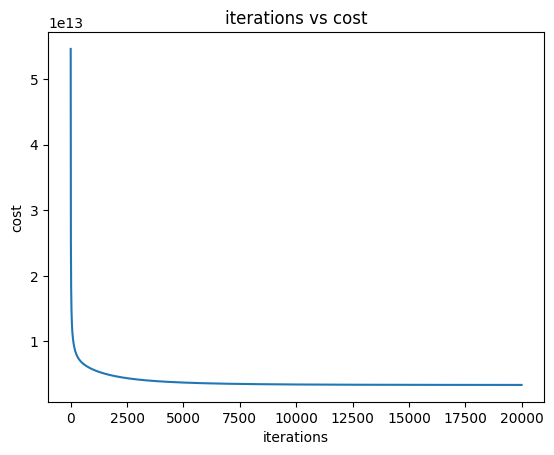

In [ ]:
t = np.arange(0, iterations)
plt.plot(t,J_history)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("iterations vs cost")

plt.show()

# ***R2 Score***

In [ ]:
# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = np.dot(X, w_norm) + b_norm


print("R2 Score")
print(r2_score(y, Y_pred))

R2 Score
[0.94632657]


# ***R2 score of cross validation set ***

In [ ]:
mu     = np.mean(x_cv,axis=0)
sigma  = np.std(x_cv,axis=0)
x_mean = (x_cv - mu)
x_cv = (x_cv - mu)/sigma
X_cv = poly(x_cv,5)

In [ ]:
# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred_cv = np.dot(X_cv, w_norm) + b_norm


print("R2 Score")
print(r2_score(y_cv, Y_pred_cv))

R2 Score
[0.93873675]


# ***Comparing data vs predication***

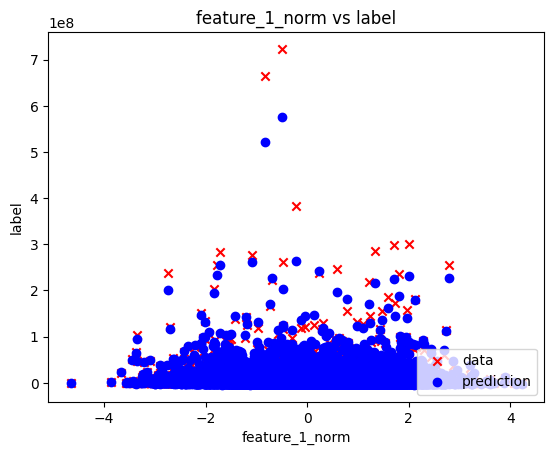

In [ ]:
plt.scatter(x_norm[:,0],y,marker='x',c='r')
plt.scatter(x_norm[:,0],Y_pred,marker='o',c='b')
plt.xlabel("feature_1_norm")
plt.ylabel("label")
plt.title("feature_1_norm vs label")
plt.legend(["data", "prediction"], loc ="lower right")
plt.show()

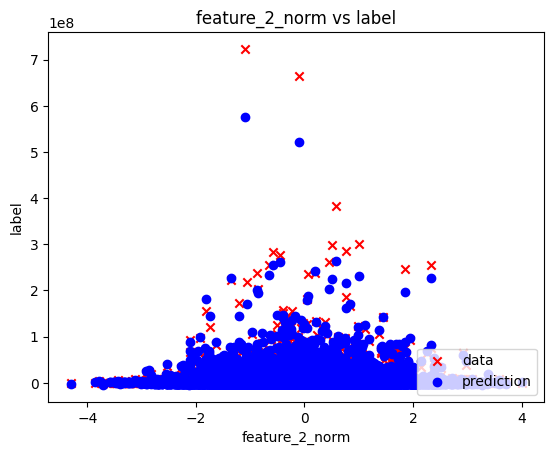

In [ ]:
plt.scatter(x_norm[:,1],y,marker='x',c='r')
plt.scatter(x_norm[:,1],Y_pred,marker='o',c='b')
plt.xlabel("feature_2_norm")
plt.ylabel("label")
plt.title("feature_2_norm vs label")
plt.legend(["data", "prediction"], loc ="lower right")
plt.show()

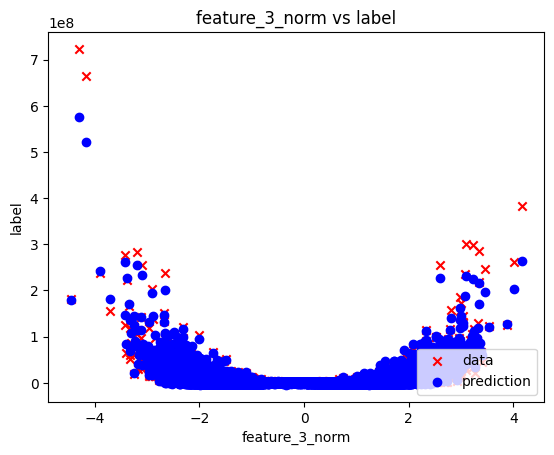

In [ ]:
plt.scatter(x_norm[:,2],y,marker='x',c='r')
plt.scatter(x_norm[:,2],Y_pred,marker='o',c='b')
plt.xlabel("feature_3_norm")
plt.ylabel("label")
plt.title("feature_3_norm vs label")
plt.legend(["data", "prediction"], loc ="lower right")
plt.show()

# ***Predicting and saving test files***

In [ ]:
#importing dataset
data_pred = pd.read_csv('/content/drive/MyDrive/Dataset/Polynomialdata_test.csv')
x_test= data_pred.iloc[:,1:4].values


In [ ]:
mu     = np.mean(x_test,axis=0)
sigma  = np.std(x_test,axis=0)
x_test_norm = (x_test - mu)/sigma
x_test_norm.shape

(10000, 3)

In [ ]:
X_test=poly(x_test_norm,5)

In [ ]:
y_test=np.dot(X_test, w_norm) + b_norm

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
data_pred.insert(0,'label',y_test)

In [ ]:
data_pred.to_csv('Polynomialdata_test_pred.csv',index=False)